# Three body problem -- Solved.

If you haven't looked at our original code yet, you should do so now before reading this.
We had to fix that code, but basically it was pretty close to correct.
Two bugs only!

Using the sun, earth and moon, with real physical constants

We do this in a 2D plane, using Newton's law of gravitation and F=ma. 

Our sanity check of the code is that we expect the earth to go around the sun in about 365 days (a year). And the moon to go around the earth in about 29 days (a month). 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # This is the numerical solver

Physical constants, from Heather.


In [2]:
# Newton's gravitational constant
G = 6.674e-11

In [3]:
G

6.674e-11

In [4]:
# masses of the bodies, in kg
m_earth= 5.972e24
m_sun= 1.989e30
m_moon = 7.348e22

In [5]:
# typical distances, in meters
d_earth_sun=149.6e9
d_earth_moon= 3.84e8

We set the sun at the centre, earth to the right, and moon above the earth. 

In [6]:
# Our initial setup of position and velocities
# Sun at centre, earth along the x-axis, moon sits above earth with positive y value
# Use the typical distances mentioned above
# We use the velocities suggested by Sam, which he pulled out from somewhere

# BUG FIX
# Initially we have vel_moon = (1022,0), which would cause the moon to crash into the earth
# We fixed that, so the moon starts off traveling along with the earth in the vertical direction

pos_sun = (0,0)
vel_sun = (0,0)
pos_earth = (d_earth_sun,0)  # earth sits to the right of the sun
vel_earth = (0,30.3e3) # earth is moving upwards
pos_moon = (d_earth_sun,d_earth_moon) # moon sit above the earth
vel_moon = (1022,30.3e3)  # moon moves away from sun horizontally, with speed of earth vertically. 

Here we define the right hand side function (rhs) to insert into the differential equation solver. Our variables container Y holsd the 2D position and velocities for all three bodies in the problem. A total of 12 components. 

The formula comes from Newton's law, which says something like mass times acceleration of one particle is equal to a force that depends on the sum of the force of gravity from each of the other forces. The force between two particles has a magnitude which is a product of the masses, times the gravitational constant, divided by the distance squared between them. (From Zack and Alex, I think. Quoting Newton.) More formally
$$ m_k \mathbf{a}_k = \sum_{i\neq k} \frac{Gm_k m_i}{|\mathbf{p}_k - \mathbf{p}_i|^3} (\mathbf{p}_k - \mathbf{p}_i).$$

In [7]:
def rhs(Y,t,omega):  # this is the function of the right hand side of the ODE
    # Y = input, a list of 12 values
    # Y[0],Y[1],Y[2] are the x-component of the positions of sun, earth, moon
    # Y[3],Y[4],Y[5] are the x-component of their velocities
    # Y[6],Y[7],Y[8] are the y-component of the positions of sun, earth, moon
    # Y[9],Y[10],Y[11] are the y-component of their velocities
    #
    # Z = output. The time derivative of the above quantities
    Z=[0.0,0.0,0.0, 0.0,0.0,0.0, 0.0,0.0,0.0, 0.0,0.0,0.0]
    # 
    # x 1st derivative
    Z[0] = Y[3]
    Z[1] = Y[4]
    Z[2] = Y[5]
    # y 1st derivatives
    Z[6] = Y[9]
    Z[7] = Y[10]
    Z[8] = Y[11]
    # BUG FIX BELOW -- we were using Z as if it was the input. Need to use Y. 
    # Maybe we can all this a typo. All the equations below need Y[k]'s on the right hand side
    
    # factors in Newtons grav law, from distances of earth to sun, moon to sun, earth to moon
    k_es = G/((Y[0]-Y[1])**2 + (Y[6]-Y[7])**2)**(1.5)
    k_ms = G/((Y[0]-Y[2])**2 + (Y[6]-Y[8])**2)**(1.5)
    k_em = G/((Y[1]-Y[2])**2 + (Y[7]-Y[8])**2)**(1.5)
    # x accelerations
    Z[3] = k_es*m_earth*(Y[1]-Y[0]) + k_ms*m_moon*(Y[2]-Y[0])
    Z[4] = k_es*m_sun*(Y[0]-Y[1]) + k_em*m_moon*(Y[2]-Y[1])
    Z[5] = k_ms*m_sun*(Y[0]-Y[2]) + k_em*m_earth*(Y[1]-Y[2])
    # y accelerations
    Z[9] = k_es*m_earth*(Y[7]-Y[6]) + k_ms*m_moon*(Y[8]-Y[6])
    Z[10] = k_es*m_sun*(Y[6]-Y[7]) + k_em*m_moon*(Y[8]-Y[7])
    Z[11] = k_ms*m_sun*(Y[6]-Y[8]) + k_em*m_earth*(Y[7]-Y[8])
    return Z

We set up the initial value list. Here it become obvious that our ordering of the variables in Y is not optimal.

In [8]:
Yinit = [0.0,0.0,0.0, 0.0,0.0,0.0, 0.0,0.0,0.0, 0.0,0.0,0.0]
Yinit[0] = pos_sun[0]
Yinit[1] = pos_earth[0]
Yinit[2] = pos_moon[0]
Yinit[3] = vel_sun[0]
Yinit[4] = vel_earth[0]
Yinit[5] = vel_moon[0]
Yinit[6] = pos_sun[1]
Yinit[7] = pos_earth[1]
Yinit[8] = pos_moon[1]
Yinit[9] = vel_sun[1]
Yinit[10] = vel_earth[1]
Yinit[11] = vel_moon[1]


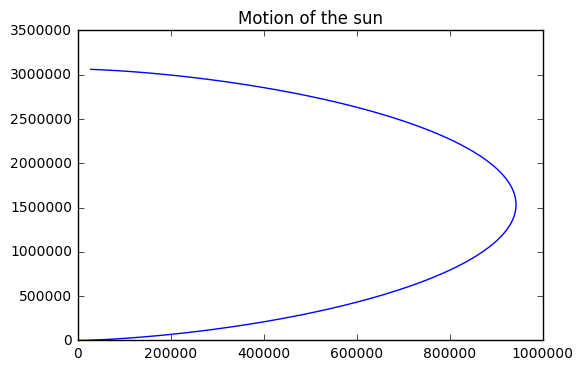

In [9]:
# Here we do the standard setup for the ODE solver odeint.
# I didn't think too hard, just wanted to solve for a year worth of data

year_secs = 365*24*60*60  # seconds in a year
t_arr=np.linspace(0,year_secs,365) 
omega = 0.0  # this is a hack, to ge the next line to run
y_arr=odeint(rhs,Yinit,t_arr,args=(omega,))

# Now take the ouput data and save as vectors of positions
sun_x,sun_y = y_arr[:,0],y_arr[:,6]
earth_x,earth_y = y_arr[:,1],y_arr[:,7]
moon_x,moon_y = y_arr[:,2],y_arr[:,8]
#we plot the motion of the sun
plt.plot(sun_x,sun_y)
plt.title('Motion of the sun')

Yout might want to ask yourself why the sun seems to be moving in a parabolic shape. What's going on here? Think carefully! Or play around with your numerical solutions!

For our sanity check, let's verify that the earth and moon are doing the right thing.

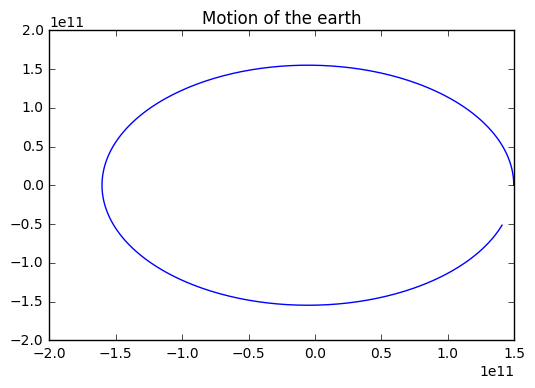

In [10]:
# Plot of the orbit of the earth around the sun
plt.plot(earth_x,earth_y)
plt.title('Motion of the earth')


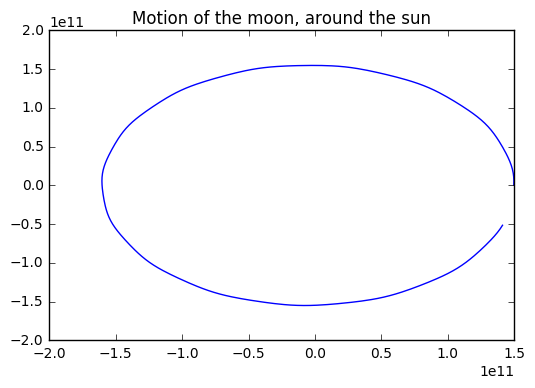

In [11]:
# Plot the orbit of the moon around the sun
plt.plot(moon_x,moon_y)
plt.title('Motion of the moon, around the sun')


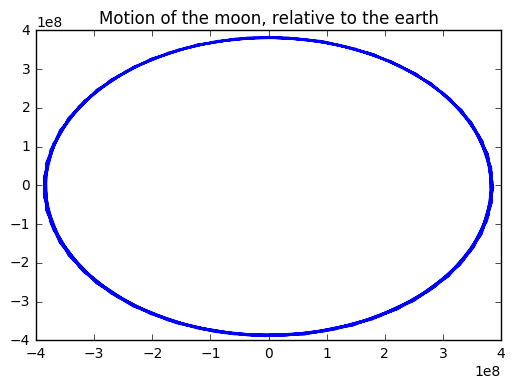

In [12]:
# Let's plot the orbit of moon, relative to the earth's position
plt.plot(moon_x-earth_x,moon_y-earth_y)
plt.title('Motion of the moon, relative to the earth')

Notice this curve is thick. The moon sort of wobbles around an elliptical curve. Why?

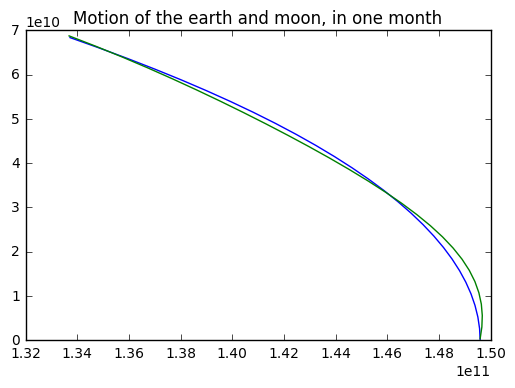

In [13]:
# Let's look at a month's worth of data
sun_x,sun_y = y_arr[0:28,0],y_arr[0:28,6]
earth_x,earth_y = y_arr[0:28,1],y_arr[0:28,7]
moon_x,moon_y = y_arr[0:28,2],y_arr[0:28,8]
plt.plot(earth_x,earth_y,moon_x,moon_y)
plt.title('Motion of the earth and moon, in one month')

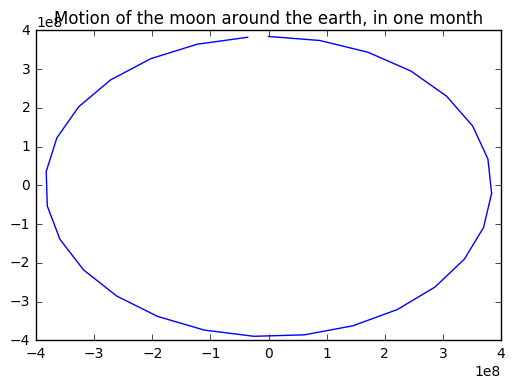

In [14]:
plt.plot(moon_x-earth_x,moon_y-earth_y)
plt.title('Motion of the moon around the earth, in one month')